In [1]:
import pandas as pd
import numpy as np
from CryptoFinance import CryptoScraper as cs
from time import sleep
import math
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import re
import warnings

warnings.simplefilter('ignore')

In [2]:

# chunks = pd.read_csv(r"C:\Users\abume\Downloads\Bitcoin_tweets\Bitcoin_tweets.csv", chunksize=100000,lineterminator='\n', index_col=0)
# df = pd.concat(chunks)
# df.head()

In [2]:
raw_df = pd.read_parquet(r"C:\Users\abume\Downloads\Bitcoin_tweets\tweeets_text_date.parquet")
raw_df.head()

,date,text
user_name,,
DeSota Wilson,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
CryptoND,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
Tdlmatias,2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
Crypto is the future,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...


In [3]:
# df.drop(df[df['user_followers'] == ' Laptops and more."'].index, inplace=True)
# df.reset_index(inplace=True)

tweets = raw_df.copy() #df[['date', 'text']]
tweets.set_index('date', inplace=True)
tweets.head()

,text
date,
2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...


In [4]:
tweets_resampled = tweets.resample('3T').last()
tweets_resampled.shape

(337703, 1)

In [5]:
tweets_resampled.head()

,text
date,
2021-02-05 10:51:00,#Bitcoin and #ETH both have bullish setups for...
2021-02-05 10:54:00,$PERL 0.06.\nI have insisted that since 0.02 i...
2021-02-05 10:57:00,"#Bitcoin braces for $48,000 as inverse head-an..."
2021-02-05 11:00:00,1 BTC Price: Bitstamp 37475.23 USD Coinbase U...
2021-02-05 11:03:00,We are gaining pace with more and more institu...


No missing values in tweets dataframe.

In [ ]:
# create hashes as tweet ids using md5
from hashlib import md5
hash = md5()

def hash_value(x):
    hash.update(x.encode())
    return hash.hexdigest()

Next, convert the datetime strinng to datetime object

In [ ]:

try:
    tweets.index = pd.to_datetime(tweets.index, errors='coerce')
except (pd.errors.ParserError, ValueError):
    pass

tweets.dropna(subset=tweets.index, inplace=True)


In [6]:
tweets.index = pd.to_datetime(tweets.index)

In [7]:
tweets.index

DatetimeIndex(['2021-02-10 23:59:04', '2021-02-10 23:58:48',
               '2021-02-10 23:54:48', '2021-02-10 23:54:33',
               '2021-02-10 23:54:06', '2021-02-10 23:53:30',
               '2021-02-10 23:53:17', '2021-02-10 23:52:42',
               '2021-02-10 23:52:25', '2021-02-10 23:52:08',
               ...
               '2023-01-06 17:46:53', '2023-01-06 17:46:50',
               '2023-01-06 17:46:50', '2023-01-06 17:46:44',
               '2023-01-06 17:46:36', '2023-01-06 17:46:35',
               '2023-01-06 17:46:29', '2023-01-06 17:46:22',
               '2023-01-06 17:46:20', '2023-01-06 17:46:17'],
              dtype='datetime64[ns]', name='date', length=4689288, freq=None)

In [ ]:
# def clean_text(text):
#     # # remove punctuations
#     # text = "".join([char for char in text if char not in string.punctuation]).lower()
#     # # text to lowercase
#     # text = text.split()
#     # # lematize each word in text and return a list of lematized words
#     # return [wnl.lemmatize(word) for word in text if word not in stopwords_list]
#     wnl = WordNetLemmatizer()
#     text = re.sub(r"#\w+\s*", "", str(text))
    
#     # remove punctuations
#     text = "".join([char for char in text if char not in string.punctuation]).lower()
#     # tokenize
#     tokens = re.split('\W+', text)
#     # remove stopwords, lematize and return
#     return " ".join([wnl.lemmatize(word).strip() for word in tokens if word not in stopwords.words('english')])

In [ ]:
# sample.reset_index(drop=True, inplace=True)
# sample['clean'] = sample['text'][:10000].apply(lambda x: clean_text(x))

In [8]:
import warnings
warnings.simplefilter('ignore')

Sentiment Analysis with roBERTa

In [24]:
# import torch
# from torch.nn.functional import softmax
# from transformers import AutoModelForSequenceClassification, AutoTokenizer

# model_id = "cardiffnlp/twitter-roberta-base-sentiment-latest" #'cardiffnlp/twitter-roberta-base-sentiment'

# tokenizer = AutoTokenizer.from_pretrained(model_id)
# model = AutoModelForSequenceClassification.from_pretrained(model_id)

# def get_sentiment(text):
#     # Tokenize and encode the text
#     encoded_input = tokenizer(text, return_tensors="pt", padding=True, max_length=412, truncation=True)

#     # Get the sentiment prediction from the model
#     outputs = model(**encoded_input)
#     prediction_scores = outputs.logits  # prediction scores for sentiment classes
#     scores = softmax(prediction_scores)
 
#     # Get the predicted sentiment class (index of the highest score)
#     sentiment = prediction_scores.argmax(axis=1).detach().numpy()  # and convert to NumPy array
#     return sentiment[0]

Run sentiment analysis

In [180]:
# tweets_resampled['sentiment'] = tweets_resampled['text'].apply(lambda x: get_sentiment(str(x)))

Save result of SA

In [5]:
# tweets_resampled.to_parquet(r"C:\Users\abume\Downloads\Bitcoin_tweets\tweeets_text_sentiment.parquet", engine='fastparquet')
tweets_sentiment = pd.read_parquet(r"C:\Users\abume\Downloads\Bitcoin_tweets\tweeets_text_sentiment.parquet")
tweets_sentiment.index = tweets_sentiment.index.tz_localize('UTC')
tweets_sentiment.head()

,text,sentiment
date,,
2021-02-05 10:51:00+00:00,#Bitcoin and #ETH both have bullish setups for...,2
2021-02-05 10:54:00+00:00,$PERL 0.06.\nI have insisted that since 0.02 i...,2
2021-02-05 10:57:00+00:00,"#Bitcoin braces for $48,000 as inverse head-an...",1
2021-02-05 11:00:00+00:00,1 BTC Price: Bitstamp 37475.23 USD Coinbase U...,1
2021-02-05 11:03:00+00:00,We are gaining pace with more and more institu...,2


Resample sentiments by Hour, using the most common sentiment in the hour as the sentiment

In [26]:
def most_common_sentiment(series):
    return series.mode()[0]

sentiment = tweets_sentiment["sentiment"]

# mode = pd.Series.mode()

sentiment = sentiment.resample('60T').apply(most_common_sentiment)

In [28]:
sentiment.value_counts()

1    15582
2     1294
0       10
Name: sentiment, dtype: int64

<!--  -->

<b>Now let's retrieve the bitcoin data from the database via the CryptoAppScrapper app</b>

A period of 730 days with a frequency of 1 hour is used.

In [8]:
cache_explorer = cs.CacheExplorer(currency='BTC', period='730d')
df = cache_explorer.get_currency_history()
df.head()

,_id,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-08-03 00:00:00+00:00,28204.455078,28602.572266,27945.894531,28327.294922,0.0,0.0,0.0
1,2021-08-03 01:00:00+00:00,28326.119141,28326.119141,27973.533203,27973.533203,0.0,0.0,0.0
2,2021-08-03 02:00:00+00:00,27974.931641,28125.648438,27919.728516,28064.576172,0.0,0.0,0.0
3,2021-08-03 03:00:00+00:00,28064.537109,28067.361328,27771.798828,27840.082031,87914496.0,0.0,0.0
4,2021-08-03 04:00:00+00:00,27833.152344,27925.753906,27577.039062,27577.039062,96643072.0,0.0,0.0


In [9]:
df['datetime'] = df['_id']
df.set_index(df['datetime'], inplace=True)
df.index = pd.to_datetime(df.index, infer_datetime_format=True)
df.head()


btc = df[['Open', 'High', 'Low', 'Close']]
btc.head()

,Open,High,Low,Close
datetime,,,,
2021-08-03 00:00:00+00:00,28204.455078,28602.572266,27945.894531,28327.294922
2021-08-03 01:00:00+00:00,28326.119141,28326.119141,27973.533203,27973.533203
2021-08-03 02:00:00+00:00,27974.931641,28125.648438,27919.728516,28064.576172
2021-08-03 03:00:00+00:00,28064.537109,28067.361328,27771.798828,27840.082031
2021-08-03 04:00:00+00:00,27833.152344,27925.753906,27577.039062,27577.039062


In [29]:
merged_data = btc.merge(sentiment, left_index=True, right_index=True, how='left')
merged_data.head()

,Open,High,Low,Close,sentiment
datetime,,,,,
2021-08-03 00:00:00+00:00,28204.455078,28602.572266,27945.894531,28327.294922,1.0
2021-08-03 01:00:00+00:00,28326.119141,28326.119141,27973.533203,27973.533203,1.0
2021-08-03 02:00:00+00:00,27974.931641,28125.648438,27919.728516,28064.576172,1.0
2021-08-03 03:00:00+00:00,28064.537109,28067.361328,27771.798828,27840.082031,1.0
2021-08-03 04:00:00+00:00,27833.152344,27925.753906,27577.039062,27577.039062,1.0


In [30]:
merged_data.isna().sum()

Open            0
High            0
Low             0
Close           0
sentiment    4835
dtype: int64

In [140]:
# import pandas as pd

# # Your merged_data DataFrame
# # ...

# # Resample to 1-hour intervals and aggregate sentiment by most common value
# hourly_data = merged_data.resample('1H').agg({
#     'Open': 'first',
#     'High': 'max',
#     'Low': 'min',
#     'Close': 'last',
#     'sentiment': lambda x: x.mode()[0] #value_counts().index[0]
# })

# # Drop rows with all NaN values (if needed)
# no_nan = hourly_data.dropna(axis=0)

# # Print the resulting hourly_data DataFrame
# hourly_data


In [31]:
data_clean = merged_data.dropna(axis=0)

In [141]:
# data_clean.to_parquet("btc_sentiment.parquet")

In [32]:
data_clean

,Open,High,Low,Close,sentiment
datetime,,,,,
2021-08-03 00:00:00+00:00,28204.455078,28602.572266,27945.894531,28327.294922,1.0
2021-08-03 01:00:00+00:00,28326.119141,28326.119141,27973.533203,27973.533203,1.0
2021-08-03 02:00:00+00:00,27974.931641,28125.648438,27919.728516,28064.576172,1.0
2021-08-03 03:00:00+00:00,28064.537109,28067.361328,27771.798828,27840.082031,1.0
2021-08-03 04:00:00+00:00,27833.152344,27925.753906,27577.039062,27577.039062,1.0
...,...,...,...,...,...
2023-01-09 19:00:00+00:00,14236.488281,14236.488281,14195.312500,14195.312500,1.0
2023-01-09 20:00:00+00:00,14192.876953,14195.422852,14126.580078,14128.775391,1.0
2023-01-09 21:00:00+00:00,14130.629883,14159.559570,14106.828125,14107.657227,1.0


In [72]:
# def classify_sentiment(value):
#     return 1 if value == 1 else (2 if value > 1 else 0)

In [73]:
# data_clean['sentiment'] = data_clean['sentiment'].apply(lambda x: classify_sentiment(x))

In [20]:
data_clean.describe()

,Open,High,Low,Close,sentiment
count,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000
mean,26837.956039,26933.007736,26739.094500,26836.233969,1.065442
std,9751.803580,9796.445450,9705.191632,9752.270962,0.311088
min,13225.777344,13288.554688,13195.842773,13228.312500,0.000000
25%,17498.417969,17540.890625,17443.201172,17491.777344,1.000000
50%,28122.261719,28218.951172,27980.861328,28113.849609,1.000000
75%,33923.312500,34081.207031,33820.777344,33931.281250,1.000000
max,50979.144531,51068.097656,50859.015625,50992.585938,2.000000


In [21]:
data_clean.isna().sum()

Open         0
High         0
Low          0
Close        0
sentiment    0
dtype: int64

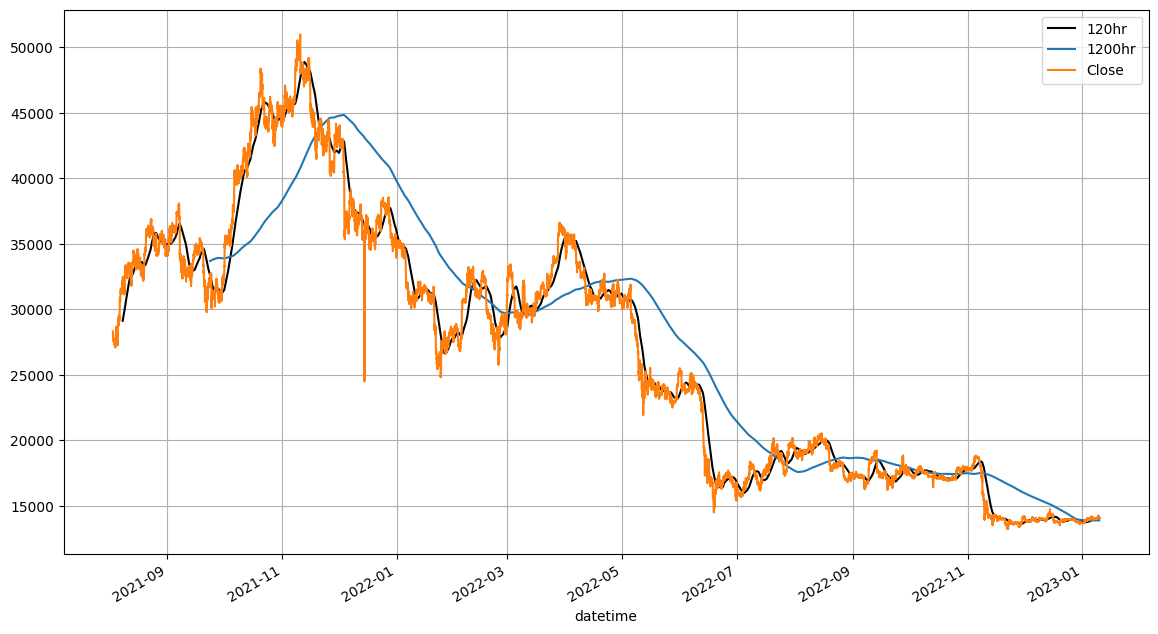

In [22]:
plt.figure(figsize=(14,8))
data_clean['Close'].rolling(120).mean().plot(label='120hr', color='black')
data_clean['Close'].rolling(1200).mean().plot(label='1200hr')
data_clean['Close'].plot(label='Close')
plt.grid(True)
plt.legend()

<Axes: >

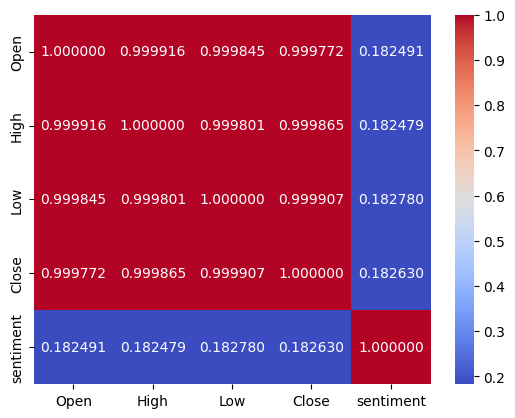

In [33]:
sns.heatmap(pd.DataFrame(data_clean).corr(), cmap='coolwarm', annot=True, fmt='4f')

In [34]:
# data_clean.iloc[:9975]

data_clean.plot(figsize=(14,8), color=sns.color_palette()[0])

##XGBoost

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

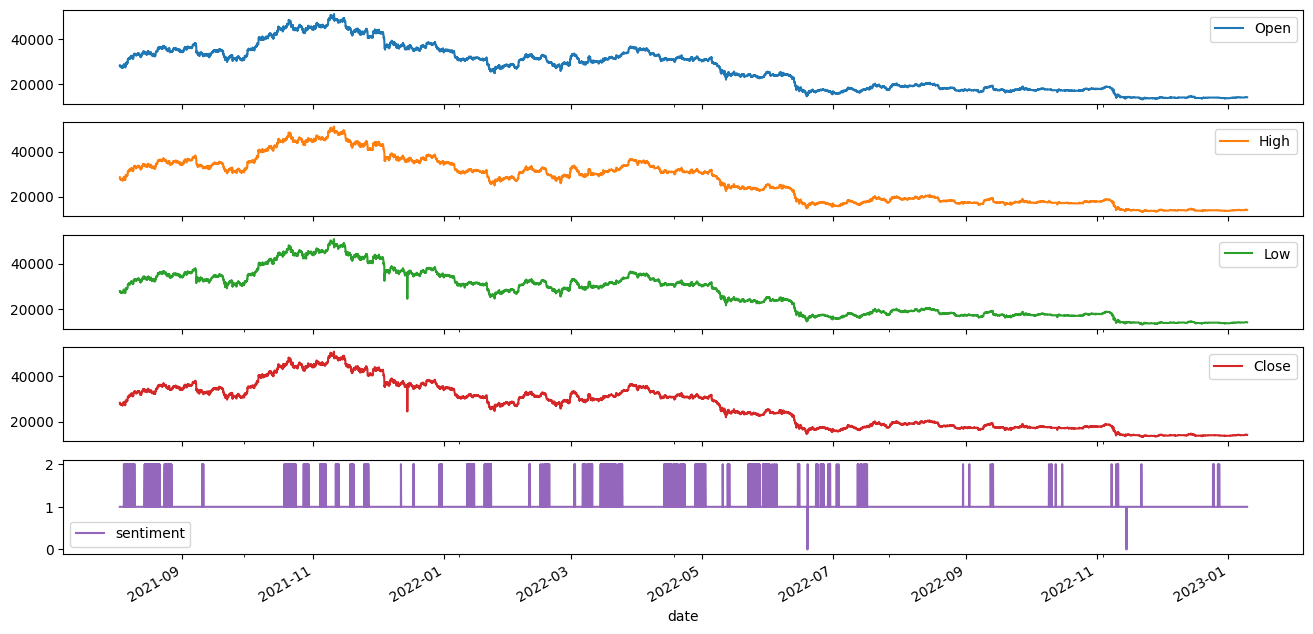

In [196]:
data_clean.plot(subplots=True, figsize=(16,8))

In [35]:
# train = data_clean.iloc[:9975] # 80% of df
# test = data_clean.iloc[9975:] # 20% of df
# data_clean.index[9975]

In [36]:
# fig, ax = plt.subplots(figsize=(13,7))
# train['Close'].plot(ax=ax, label='Training subset')
# test['Close'].plot(ax=ax, label='test subset', color='grey')
# ax.axvline(data_clean.index[9975], color='red', ls='--')
# plt.legend()
# plt.show()

Preproess and Splits

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



scaler = MinMaxScaler()


def split_data(df, n=80):
    n = int(80 * len(df) / 100)
    train = data_clean.iloc[:n]
    test = data_clean.iloc[n:]
    return train, test

<!--  -->

Hyperparameter tuning with GridSearchCV

## LSTM

In [84]:
from keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow import keras
from keras.layers import Dense, Input, LSTM, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.activations import relu, sigmoid, tanh
from keras.optimizers import SGD, Adam
from keras.losses import MeanSquaredError  # error estimation

ModuleNotFoundError: No module named 'keras.wrappers'

In [85]:
data_clean.head()

,Open,High,Low,Close,sentiment
datetime,,,,,
2021-08-03 00:00:00+00:00,28204.455078,28602.572266,27945.894531,28327.294922,1.0
2021-08-03 01:00:00+00:00,28326.119141,28326.119141,27973.533203,27973.533203,1.0
2021-08-03 02:00:00+00:00,27974.931641,28125.648438,27919.728516,28064.576172,1.0
2021-08-03 03:00:00+00:00,28064.537109,28067.361328,27771.798828,27840.082031,1.0
2021-08-03 04:00:00+00:00,27833.152344,27925.753906,27577.039062,27577.039062,1.0


In [40]:
lstm_data_scaled = scaler.fit_transform(data_clean)
lstm_data_scaled

array([[0.39675078, 0.40535211, 0.39163062, 0.39982187, 0.5       ],
       [0.39997338, 0.39803458, 0.39236446, 0.39045424, 0.5       ],
       [0.39067123, 0.39272825, 0.39093588, 0.39286506, 0.5       ],
       ...,
       [0.02396747, 0.02305493, 0.0241877 , 0.0232851 , 0.5       ],
       [0.02337879, 0.02255411, 0.02411709, 0.02370446, 0.5       ],
       [0.02380047, 0.02231633, 0.02379314, 0.02341838, 0.5       ]])

Split data into train and validation sets.

Here, I am using all features as the training data, while the target is the validation data. However,

In [57]:
lstm_features = lstm_data_scaled
lstm_target = lstm_data_scaled[:, 3]
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(lstm_features, lstm_target, train_size=.8, random_state=42, shuffle=False)

X_train_lstm.shape, X_test_lstm.shape, y_train_lstm.shape, y_test_lstm.shape

((9975, 5), (2494, 5), (9975,), (2494,))

In [66]:
window_length = 1*24*5 # hourly data of five days = 120 hours
batch_size = 32
num_features = 5

lstm_train = TimeseriesGenerator(X_train_lstm, y_train_lstm, length=window_length, batch_size=batch_size)
lstm_test = TimeseriesGenerator(X_test_lstm, y_test_lstm, length=window_length, batch_size=batch_size)


In [67]:
lstm_train[0]

(array([[[0.39675078, 0.40535211, 0.39163062, 0.39982187, 0.5       ],
         [0.39997338, 0.39803458, 0.39236446, 0.39045424, 0.5       ],
         [0.39067123, 0.39272825, 0.39093588, 0.39286506, 0.5       ],
         ...,
         [0.48879234, 0.49421278, 0.49017075, 0.4950518 , 1.        ],
         [0.49566797, 0.49696161, 0.49525898, 0.49526612, 1.        ],
         [0.49560195, 0.50211072, 0.49528423, 0.50336545, 0.5       ]],
 
        [[0.39997338, 0.39803458, 0.39236446, 0.39045424, 0.5       ],
         [0.39067123, 0.39272825, 0.39093588, 0.39286506, 0.5       ],
         [0.39304467, 0.39118543, 0.38700818, 0.38692045, 0.5       ],
         ...,
         [0.49566797, 0.49696161, 0.49525898, 0.49526612, 1.        ],
         [0.49560195, 0.50211072, 0.49528423, 0.50336545, 0.5       ],
         [0.5036046 , 0.51195701, 0.50430379, 0.50908954, 1.        ]],
 
        [[0.39067123, 0.39272825, 0.39093588, 0.39286506, 0.5       ],
         [0.39304467, 0.39118543, 0.3870081

In [79]:
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(units, input_shape):
    model = Sequential()
    model.add(LSTM(units, input_shape, return_sequences=True))
    model.add(LeakyReLU(alpha=.2))
    model.add(LSTM(units/4, return_sequences=False))
    model.add(LeakyReLU(alpha=.2))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=1))
    model.compile(optimizers='adam', losses=[MeanSquaredError()])
    return model


def tune_hyperparameters():
    param_grid = {
        'units': [32, 64, 128],
        'epochs': [20, 35, 50],
        'batch_size': [32, 64, 128],
        'learning_rate': [0.01, 0.001, 0.0001],
        'dropout_rate': [0.2, 0.25]

    }

    lstm_model = KerasRegressor(build_fn=create_model, input_shape=(120, 5))

    grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_results = grid.fit(lstm_train)

    print(f'Best tuned Hyperparameters: {grid_results.best_params_}')


tune_hyperparameters()


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [69]:




lstm_model = Sequential()

lstm_model.add(LSTM(units=64, input_shape=(window_length, num_features), return_sequences=True))
lstm_model.add(LeakyReLU(alpha=.2))
lstm_model.add(LSTM(units=16, return_sequences=False))
lstm_model.add(LeakyReLU(alpha=.2))
lstm_model.add(Dropout(rate=0.2))
lstm_model.add(Dense(units=1))

lstm_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 64)           17920     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 120, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                5184      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 23121 (90.32 KB)
Trainable params: 23121 (